## Shanti Kandel
### Data Analytics Fundamentals
### project 7- task 3
### 02/25/2023

In [124]:
#lambda function c that converts a temperature from Fahrenheit to Celsius. The conversion formula is:
c = lambda f: 5/9 *(f - 32)
temps= [(f, c(f))for f in range(0,101,10)] 

In [125]:
import pandas as pd

In [126]:
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'celsius'])

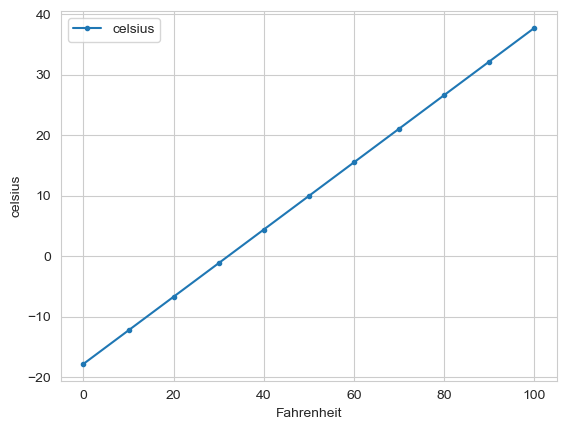

In [127]:
#generating a line plot of temperature data in Celsius versus Fahrenheit using the matplotlib library, based on a DataFrame temps_df that contains temperature data in both units.
axes = temps_df.plot( x = 'Fahrenheit', y ='celsius',style='.-')
y_label = axes.set_ylabel('celsius')

In [128]:
#loading the average high temperatures into a dataframe
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [163]:
#head of the data
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [164]:
#tail of the data 
nyc.tail()

,Date,Temperature,Anomaly
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4
123,2018,38.7,1.3


In [131]:
nyc.columns = ['Date','Temperature','Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [132]:
nyc.Date.dtype

dtype('int64')

In [133]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [134]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [165]:
#Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

from scipy import stats
linear_regression = stats.linregress(x= nyc.Date ,  y = nyc.Temperature)


In [136]:
linear_regression.slope

0.014771361132966163

In [137]:
linear_regression.intercept

8.694993233674289

In [138]:
linear_regression.slope * 2019 + linear_regression.intercept 

38.51837136113297

In [139]:
linear_regression.slope * 1890 + linear_regression.intercept 

36.612865774980335

In [140]:
# Using the results to predict the "average high temp in Jan" for the year 2026. 
linear_regression.slope*2026 + linear_regression.intercept

38.62177088906374

In [160]:
# importing seaborn library for stastical problems
import seaborn as sns

In [142]:
sns.set_style('whitegrid')

(10.0, 70.0)

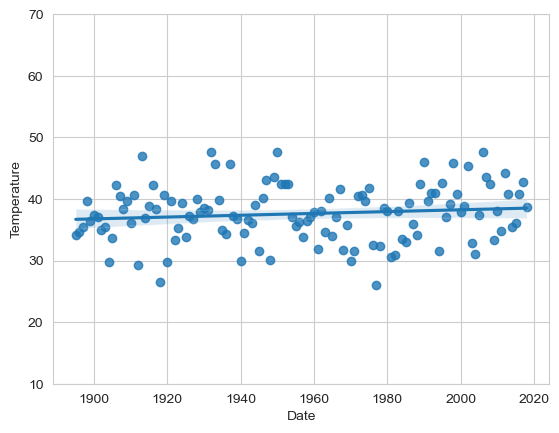

In [143]:
axes = sns.regplot( x=nyc.Date, y =nyc.Temperature)
axes.set_ylim(10, 70)


In [144]:
year = 2019
slope = linear_regression.slope
intercept = linear_regression.intercept
temperature = slope * year + intercept
while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept
year

2120

## Case Study : Time Series and Simple Linear Regression

In [145]:
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date','Temperature','Anomaly']
nyc.Date = nyc.Date.floordiv(100)

In [146]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train , x_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1,1), nyc.Temperature.values, 
    random_state= 11
)

In [149]:
x_train.shape

(93, 1)

In [150]:
x_test.shape

(31, 1)

In [151]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [152]:
linear_regression.fit(X = x_train, y = y_train)


LinearRegression()

In [153]:
linear_regression.coef_

array([0.01939167])

In [154]:
linear_regression.intercept_

-0.30779820252656265

## Testing the Model

In [155]:
predicted = linear_regression.predict(x_test)
expected = y_test
for p, e in zip(predicted [::5],expected [::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Predicting future temperatures and estimating past temperatures

In [156]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019)

array([38.84399018])

In [157]:
predict(1890)

array([36.34246432])

## Visualizing the dataset with Regression Line

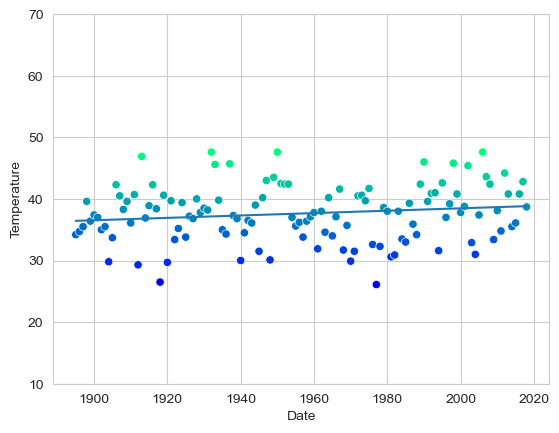

In [162]:
#Generating a scatter plot of temperature data for New York City over time, and overlays a linear regression line on top of the scatter plot.
axes_2 = sns.scatterplot(data = nyc, x= 'Date', y='Temperature',
                       hue = 'Temperature', palette= 'winter', legend = False)
axes_2.set_ylim(10, 70)

import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)


import matplotlib.pyplot as plt
line = plt.plot(x,y)